In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn. model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn. linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn. metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
carPricing = pd.DataFrame(pd.read_csv('car_price_prediction.csv'))
carPricing.head()

,Price,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags
0,25089,AUDI,100,2016,Jeep,Petrol,3.0,70782,6,Automatic,4x4,Black,12
1,10192,BMW,114,2018,Sedan,Petrol,2.0,38282,4,Automatic,4x4,White,12
2,8500,BMW,116,2008,Hatchback,Petrol,1.6,11111,2,Automatic,Rear,Red,6
3,18817,BMW,118,2010,Sedan,Diesel,2.0,197000,4,Manual,Front,Black,0
4,21012,BMW,128,2009,Coupe,Petrol,3.0,198000,6,Tiptronic,Rear,White,8


In [4]:
m = len(carPricing)
m

9640

In [5]:
df = pd.DataFrame(carPricing)
column_names = df.columns.values

In [6]:
X1 = carPricing.iloc[:, 1:12].values
Y1 = carPricing.iloc[:, 0].values

In [7]:
varlist_manu = ['Manufacturer']

def binary_map(Manufacturer) :
    return Manufacturer.map({'ACURA' : 0, 'ALFA ROMEO' : 1, 'ASTON MARTIN' : 2,
            'AUDI' : 3, 'BENTLEY' : 4, 'BMW': 5, 'BUICK' : 6,
            'CADILLAC' : 7, 'CHEVROLET' : 8, 'CHRYSLER' : 9,
            'DODGE' : 10, 'FERRARI' : 11, 'FORD' : 12,'GMC' : 13,
            'HONDA' : 14, 'HUMMER' : 15, 'HYUNDAI' : 16, 'INFINITI' : 17,
            'JAGUAR' : 18, 'JEEP' : 19, 'KIA' : 20, 'LAMBORGHINI' : 21,
            'LAND ROVER' : 22, 'LEXUS' : 23, 'LINCOLN' : 24, 'MASERATI' : 25,
            'MAZDA' : 26, 'MERCEDES-BENZ' : 27, 'MERCURY' : 28, 'MINI' : 29,
            'MITSUBISHI' : 30, 'NISSAN' : 31, 'OPEL' : 32, 'PONTIAC' : 33,
            'PORSCHE' : 34, 'ROVER' : 35, 'SAAB' : 36, 'SATURN' : 37, 
            'SCION' : 38, 'SUBARU' : 39, 'SUZUKI' : 40, 'TESLA' : 41,
            'TOYOTA' : 42, 'VOLKSWAGEN' : 43, 'VOLVO' : 44})

carPricing[varlist_manu] = carPricing[varlist_manu].apply(binary_map)

In [8]:
varlist_model = ['Model']

def binary_map (Model) :
    return Model.map({'4Runner' : 1, '520 d xDrive Luxury' : 2,
             '528 3.0' : 3, '528 i' : 4, '530 GT' : 5,
             '535 i' : 6, '535 i xDrive' : 7, '535 M PAKET' : 8,
             'A 170' : 9, 'A3' : 10, 'A3 4X4' : 11, 'A4' : 12,
             'A4 premium' : 13, 'A5' : 14, 'A5 Sportback' : 15,
             'A6' : 16, 'A6 Ð¡6' : 17, 'A6 QUATTRO' : 18, 
             'A7' : 19, 'Acadia' : 20, 'Accent' : 21, 'Accent GS' : 22,
             'Accent SE' : 23, 'Accord' : 24, 'Altima' : 25, 
             'Alto Lapin' : 26, 'Aqua' : 27, 'Aqua G' : 28, 
             'Aqua G klas' : 29, 'Aqua g soft leather sele' : 30,
             'Aqua HIBRID' : 31, 'Aqua L paketi' : 32, 'Aqua s' : 33,
             'Aqua S' : 34, 'Aqua sport' : 35, 'Atenza' : 36, 'ATS' : 37, 
             'Auris' : 38, 'Avalanche' : 39, 'Avalon' : 40, 
             'Avalon limited' : 41, 'Avalon LIMITED' : 42, 
             'Avalon Limited' : 43, 'Avella' : 44, 'Avenger' : 45,
             'Aveo' : 46, 'Axela' : 47, 'Azera' : 48, 'B 170' : 49,
             'B 170 Edition One' : 50, 'B 180' : 51, 'B 200' : 52,
             'B9 Tribeca' : 53, 'Belta' : 54, 'BRZ' : 55, 'C 180' : 56,
             'C 200' : 57, 'C 230' : 58, 'C 250' : 59, 'C 300' : 60,
             'C 300 sport' : 61, 'C 320' : 62, 'C 320 CDI' : 63, 
             'C 350' : 64, 'C 400' : 65, 'C 63 AMG' : 66, 'Caddy' : 67,
             'Cadenza' : 68, 'Caliber' : 69, 'Caliber journey' : 70,
             'Caliber sxt' : 71, 'Camaro' : 72, 'Camaro LS' : 73,
             'Camaro RS' : 74, 'Camry' : 75, 'Camry Hybrid' : 76, 
             'Camry HYBRID' : 77, 'Camry LE' : 78, 'Camry Le' : 79, 
             'Camry S' : 80, 'Camry SE' : 81, 'Camry se' : 82,
             'Camry SE HIBRYD' : 83, 'Camry sel' : 84, 'Camry sport' : 85,
             'Camry SPORT' : 86, 'Camry SPORT PAKET' : 87, 'Camry sport se' : 88,
             'Camry sporti' : 89, 'Camry XLE' : 90, 'Camry XLEi' : 91, 
             'Camry XSE' : 92, 'Camry XV50' : 93, 'Captiva' : 94, 'Caravan' : 95,
             'Caravan tradesman' : 96, 'Carens' : 97, 'Carnival' : 98,
             'Carnival grand' : 99, 'Cayenne' : 100, 'CC' : 101, 'Ceed' : 102,
             'Century' : 103, 'Cerato' : 104, 'CERVO' : 105, 'Challenger' : 106,
             'Cherokee' : 107, 'CHR' : 108, 'Civic' : 109, 'Civic EX' : 110,
             'Civic Hybrid' : 111, 'CL550 AMG' : 112, 'CLA 250' : 113, 'CLK 350' : 114,
             'CLS 350 AMG' : 115, 'CLS 55 AMG' : 116, 'CLS 550' : 117, 
             'CLS 550 550' : 118, 'C-MAX' : 119, 'Colt' : 120, 'ColtPlus' : 121,
             'Compass' : 122, 'Corolla' : 123, 'Corolla 04' : 124, 'Corolla ECO' : 125,
             'Corolla IM' : 126, 'Corolla Im' : 127, 'Corolla LE' : 128, 'Corolla S' : 129,
             'Corolla se' : 130, 'Corvette' : 131, 'Courier' : 132, 'Crafter' : 133,
             'Crafter 2,5TDI' : 134, 'Crossroad' : 135, 'Crosstour' : 136,
             'Crosstrek' : 137, 'Cruze' : 138, 'Cruze L T' : 139, 'Cr-v' : 140, 
             'CR-Z' : 141, 'CT 200h' : 142, 'CT 200h 1.8' : 143, 'CT 200h F sport' : 144,
             'CT 200h F SPORT' : 145, 'CT 200h F-sport' : 146, 'CX-3' : 147,
             'CX-5' : 148, 'CX-5 Touring' : 149, 'CX-7' : 150, 'CX-9' : 151,
             'Daimler' : 152, 'Dart' : 153, 'Dart GT 2.4' : 154, 'Delica' : 155,
             'Demio' : 156, 'Discovery' : 157, 'DTS' : 158, 'E 200' : 159, 'E 220' : 160,
             'E 250' : 161, 'E 300' : 162, 'E 300 AVANTGARDE-LTD' : 163, 'E 320' : 164, 
             'E 350' : 165, 'E 350 212' : 166, 'E 350 4 matic' : 167, 'E 350 4 MATIC' : 168,
             'E 350 4 Matic AMG Packag' : 169, 'E 350 AMG' : 170, 'E 400' : 171,
             'E 550' : 172, 'Edge' : 173, 'Elantra' : 174, 'Elantra GS' : 175,
             'Elantra limited' : 176, 'Elantra Limited' : 177, 'Elantra LIMITED' : 178,
             'Elantra SE' : 179, 'Elantra Se' : 180, 'Elantra se' : 181, 'Element' : 182,
             'Elysion' : 183, 'Encore' : 184, 'Eos' : 185, 'E-pace' : 186, 'Equinox' : 187,
             'ES 300' : 188, 'ES 300 hybrid' : 189, 'ES 350' : 190, 'Escalade' : 191,
             'Escape' : 192, 'Escape Hybrid' : 193, 'Explorer' : 194, 'F150' : 195,
             'F50' : 196, 'Fiesta' : 197, 'FIT' : 198, 'FIT Hybrid' : 199, 
             'FIT Modulo' : 200, 'FJ Cruiser' : 201, 'Focus' : 202, 'Focus SE' : 203,
             'Focus Titanium' : 204, 'Forester' : 205, 'Forte' : 206, 'Fortuner' : 207,
             'F-pace' : 208, 'Fred' : 209, 'Frontier' : 210, 'F-type' : 211, 'Fusion' : 212,
             'Fusion HIBRID' : 213, 'Fusion SE' : 214, 'FX35' : 215, 'G 550' : 216,
             'G 63 AMG' : 217, 'G35 x' : 218, 'G37' : 219, 'G6' : 220, 'Genesis' : 221,
             'Getz' : 222, 'Ghibli' : 223, 'GL 320' : 224, 'GL 350' : 225, 'GL 450' : 226,
             'GL 550': 227, 'GLA 250' : 228, 'GLE 350' : 229, 'GLK 350' : 230, 'Golf' : 231,
             'Grand Cherokee' : 232, 'Grand Vitara' : 233, 'Grandeur' : 234, 'Grandis' : 235,
             'GS 350' : 236, 'GTI' : 237, 'GX 460' : 238, 'GX 470' : 239, 'H1' : 240,
             'H3' : 241, 'Highlander' : 242, 'Highlander LIMITED' : 243,
             'Highlander sport' : 244, 'Hilux' : 245, 'Hr-v' : 246, 'HS 250h' : 247,
             'I' : 248, 'i3' : 249, 'I30' : 250, 'Impala' : 251, 'Impreza' : 252, 
             'Insight' : 253, 'Insight EX' : 254, 'Ipsum' : 255, 'IS 200' :256, 
             'IS 250' : 257, 'IS 300' : 258, 'IS 350' : 259, 'ISIS' : 260, 'Ist' : 261, 
             'IX35' : 262, 'Jetta' : 263, 'Jetta SE' : 264, 'Juke' : 265, 'JX35' : 266, 
             'Kalos' : 267, 'Kicks' : 268, 'Kizashi' : 269, 'kona' : 270, 'L 200' : 271,
             'Lacetti' : 272, 'LAFESTA' :273, 'Lancer' : 274, 'Land Cruiser' : 275,
             'Land Rover Sport' : 276, 'Lantra' : 277, 'Leaf' : 278, 'Legacy' : 279,
             'Liberty' : 280, 'LS 460' : 281, 'LX 570' : 282, 'M3' : 283, 'M37' : 284, 
             'M4' : 285, 'M5' : 286, 'M6' : 287, 'macan' : 288, 'Malibu' : 289, 'March' : 290,
             'Matiz' : 291, 'Maxima' : 292, 'Mazda 2' : 293, 'Mazda 3' : 294, 'Mazda 5' : 295,
             'Mazda 6' : 296, 'MDX' : 297, 'Mirage' : 298, 'MKZ' :299, 'ML 250' : 300,
             'ML 280' : 301, 'ML 300' : 302, 'ML 320' : 303, 'ML 350' : 304, 'Model X' : 305,
             'Mulsanne' : 306, 'Murano' : 307, 'Mustang' : 308, 'Navara' : 309,
             'NEW Beetle' : 310, 'Niro' : 311, 'Niva' : 312, 'Note' : 313, 'NX 200' : 314,
             'NX 300' : 315, 'Odyssey' : 316, 'Optima' : 317, 'Optima Hybid' : 318,
             'Optima k5' : 319, 'Orlando' : 320, 'Outlander' : 321, 'Outlander Sport' : 322,
             'Pacifica' : 323, 'Pajero' : 324, 'Panamera' : 325, 'Panamera S' : 326,
             'Passat' : 327, 'Passo' : 328, 'Pathfinder' : 329, 'Patriot' : 330,
             'Phaeton' : 331, 'Picanto' : 332, 'Pilot' : 333, 'Polo' : 334, 'Prius' : 335,
             'Prius C' : 336, 'Prius Plug in' : 337, 'Prius s' : 338, 'Prius V' : 339,
             'Q3' : 340, 'Q5' : 341, 'Q50 S Red' : 342, 'Q7' : 343, 'Qashqai SPORT' : 344,
             'Quest' : 345, 'QX56' : 346, 'R 350' : 347, 'Ractis' : 348, 'Ramcharger' : 349,
             'Range Rover' : 350, 'RAV 4' : 351, 'RC F' : 352, 'RDX' : 353, 'Renegade' : 354,
             'Ridgeline' : 355, 'RIO' : 356, 'Rogue' : 357, 'Routan SEL' : 358, 'RS6' : 359,
             'RVR' : 360, 'RX 300' : 361, 'RX 350' : 362, 'RX 400' : 363,
             'RX 400 HYBRID' : 364, 'RX 450' : 365, 'RX 450 HYBRID' : 366, 'S 350' : 367,
             'S 500' : 368, 'S 550' : 369, 'S3' : 370, 'Scirocco' : 371, 'Sentra' : 372,
             'Sequoia' : 373, 'Serena' : 374, 'Sharan' : 375, 'Shuttle' : 376, 
             'Sienna' : 377, 'Silverado' : 378, 'Skyline' : 379, 'SL 55 AMG' : 380,
             'Sonata' : 381, 'Sonata Hybrid' : 382, 'Sonata Limited' : 383, 
             'Sonata SPORT' : 384, 'Sonic' : 385, 'Sorento' : 386, 'SOUL' : 387,
             'Spark' : 388, 'Sportage' : 389, 'Sprinter' : 390, 'SRX' : 391, 'Stella' : 392,
             'Step Wagon' : 393, 'Suburban' : 394, 'Swift' : 395, 'SX4' : 396, 'T5' : 397,
             'Tacoma' : 398, 'Taurus' : 399, 'tC' : 400, 'Teana' : 401, 'TERRAIN' : 402,
             'Tiguan' : 403, 'Tiida' : 404, 'TLX' : 405, 'Tourneo Connect' : 406,
             'Town and Country' : 407, 'Transit' : 408, 'Transit Connect' : 409,
             'Traverse' : 410, 'Trax' : 411, 'TSX' : 412, 'Tucson' : 413,
             'Tucson SE' : 414, 'Tundra' : 415, 'UP' : 416, 'Veloster' : 417, 
             'Venza' : 418, 'Verisa' : 419, 'Versa' : 420, 'Verso' : 421, 'Viano' : 422,
             'Virage': 423, 'Vito' : 424, 'Vitz' : 425, 'Volt' : 426, 'VOXY' : 427, 
             'Vue' : 428, 'Wrangler' : 429, 'X1' : 430, 'X3' : 431, 'X4' : 432, 'X5' : 433, 
             'X6' : 434, 'XC90' : 435, 'xD' : 436, 'XF' : 437, 'X-Terra' : 438, 'XV' : 439,
             'Yaris' : 440, '100' : 441, '114' : 442, '116' : 443, '118': 444, '128' : 445, 
             '130' : 446, '135' : 447, '200' : 448, '250' : 449, '300' : 450, '320' : 451,
             '325' : 452, '328' : 453, '330' : 454, '335' : 455, '428' : 456, '435' : 457,
             '456' : 458, '528' : 459, '530' : 460, '535' : 461, '550' : 462, '616' : 463,
             '650' : 464, '730': 465, '740': 466, '911' : 467, '1000' : 468, '1300' : 469,
             '1500' : 470, '4Runner LIMITED' : 471, 'A8' : 472, 'Camry Se' : 473,
             'Cayman' : 474, 'CLS 350' : 475, 'Cruze LT' : 476, 'Discovery IV' : 477,
             'Elantra LIMITEDI' : 478, 'Outback' : 479, 'Sienta' : 480, 'Vitara' : 481,
             'A6 С6' : 482})

carPricing[varlist_model] = carPricing[varlist_model].apply(binary_map)


In [9]:
varlist_drWheels = ['Drive wheels']

def binary_map(DriveWheels) :
    return DriveWheels.map({'4x4' : 1, 'Front' : 2, 'Rear' : 3})

carPricing[varlist_drWheels] = carPricing[varlist_drWheels].apply(binary_map)

In [10]:
varlist_gearbox = ['Gear box type']

def binary_map (GearBoxType) :
    return GearBoxType.map({'Automatic' : 1, 'Manual' : 2,
                             'Tiptronic' : 3, 'Variator' : 4})
carPricing[varlist_gearbox] = carPricing[varlist_gearbox].apply(binary_map)


In [11]:
varlist_fueltype = ['Fuel type']

def binary_map(FuelType) :
    return FuelType.map({'CNG' : 1, 'Diesel' : 2, 'Hybrid' : 3,
                        'LPG' : 4, 'Petrol' : 5, 'Plug-in Hybrid' : 6})

carPricing[varlist_fueltype] = carPricing[varlist_fueltype].apply(binary_map)

In [12]:
varlist_color = ['Color']

def binary_map(color) :
    return color.map({'Beige' : 1, 'Black' : 2, 'Blue' : 3,
                    'Brown' : 4, 'Carnelian red' : 5, 'Golden' : 6, 
                    'Green' : 7, 'Grey' : 8, 'Orange' : 9, 'Pink' : 10,
                    'Purple' : 11, 'Red' : 12, 'Silver' : 13, 
                    'Sky blue' : 14, 'White' : 15, 'Yellow' : 16})

carPricing[varlist_color] = carPricing[varlist_color].apply(binary_map)


In [13]:
varlist_category = ['Category']

def binary_map (category) :
    return category.map({'Cabriolet' : 1, 'Coupe' : 2,
                        'Goods wagon' : 3, 'Hatchback' : 4, 'Jeep' : 5,
                        'Minivan' : 6, 'Microbus' : 7, 'Pickup' : 8,
                        'Sedan' : 9, 'Universal' : 10})

carPricing[varlist_category] = carPricing[varlist_category].apply(binary_map)


In [14]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test =train_test_split(carPricing, train_size = 0.8, test_size = 0.2)
df_train.shape

(7712, 13)

In [15]:
num_vars = ['Price', 'Manufacturer', 'Model', 'Prod. year', 'Category', 'Fuel type',
            'Engine volume', 'Mileage', 'Cylinders']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,Price,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders
6608,21953,42,335,2013,9,3,1.8,105600,4
725,20385,27,62,2009,9,5,3.5,200000,6
1733,45204,14,109,2016,2,5,2.0,53938,4
1019,5488,42,75,2014,9,3,2.5,109798,4
4884,36567,16,240,2016,6,2,2.5,104112,4


In [16]:
import warnings
warnings. filterwarnings('ignore')
from sklearn. preprocessing import MinMaxScaler, StandardScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
df_train.head()

,Price,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags
6608,21953,42,335,2013,9,3,1.8,105600,4,1,2,2,10
725,20385,27,62,2009,9,5,3.5,200000,6,3,3,1,0
1733,45204,14,109,2016,2,5,2.0,53938,4,1,2,3,4
1019,5488,42,75,2014,9,3,2.5,109798,4,1,2,15,12
4884,36567,16,240,2016,6,2,2.5,104112,4,1,2,15,4


In [17]:
X_train1 = df_Newtrain.values[:, 1:12]
Y_train1 = df_Newtrain.values[:,0]
X_test1 = df_Newtest.values[:, 1:12]
Y_test1 = df_Newtest.values[:,0]

In [18]:
X_train1.shape

(7712, 8)

In [19]:
X_test1.shape

(1928, 8)

In [20]:
#Now we’ll do feature scaling to scale our data between 0 and 1 to get better accuracy.
 
from sklearn.preprocessing import StandardScaler 
sc_X1 = StandardScaler() 
X_train = sc_X1.fit_transform(X_train1) 
X_test = sc_X1.transform(X_test1)

In [21]:
#Lets create a matrix with single column of ones 
X_01 = np.ones((7712, 1)) 
X_02 = np.ones((1928, 1))

In [22]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1 
X_N1 = X_train1.reshape(7712, 8) 
X_N2 = X_test1.reshape(1928, 8)

In [23]:
X_train1 = np.hstack((X_01, X_N1)) 
X_test1 = np.hstack((X_02, X_N2))

In [24]:
X_train1.shape

(7712, 9)

In [25]:
theta = np.zeros(9) 
theta
Y_train1.shape

(7712,)

In [26]:
def compute_cost(X, Y, theta): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) 

    return J

In [27]:
def gradient_descent(X, X2, Y ,Y2, theta, alpha, iterations):
    cost_history = np.zeros(iterations) 
    cost_history2 = np.zeros(iterations) 

    for i in range(iterations): 
        predictions = X.dot(theta) 
        errors = np.subtract(predictions, Y) 
        sum_delta = (alpha / m) * X.transpose().dot(errors); 
        theta = theta - sum_delta; 
        cost_history[i] = compute_cost(X, Y, theta)   
        cost_history2[i] = compute_cost(X2, Y2, theta)
    return theta, cost_history, cost_history2

In [28]:
iterations = 8000; 
alpha = 0.1;

In [29]:
theta, cost_history_a, cost_history2_a = gradient_descent(X_train1, X_test1, Y_train1, Y_test1, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history_a[-1], cost_history2_a[-1])

Final value of theta = [ 0.00772406 -0.00256079  0.00777261  0.06448992 -0.01776626 -0.00471267
  0.16932089 -0.06061433  0.10813026]
cost_history = 0.0008012047365400666 0.0009709466146530722


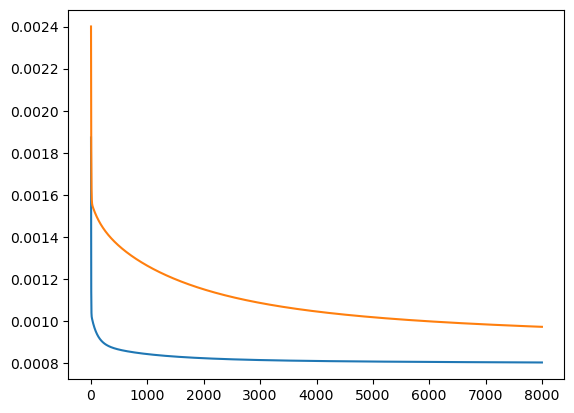

In [30]:
plt.plot(cost_history_a, label = "line 1")
plt.plot(cost_history2_a, label = "line 2")

In [39]:
carPricing.head()

,Price,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags
0,25089,3,441,2016,5,5,3.0,70782,6,1,1,2,12
1,10192,5,442,2018,9,5,2.0,38282,4,1,1,15,12
2,8500,5,443,2008,4,5,1.6,11111,2,1,3,12,6
3,18817,5,444,2010,9,2,2.0,197000,4,2,2,2,0
4,21012,5,445,2009,2,5,3.0,198000,6,3,3,15,8


In [40]:
sum_1 = theta[8]*(3)+theta[7]*(441)+theta[6]*(2016)+theta[5]*(5)+theta[4]*(5)+theta[3]*(3.0) + theta[2]*(70782) + theta[1]*(6) + theta[0]
sum_2 = theta[8]*(5)+theta[7]*(442)+theta[6]*(2018)+theta[5]*(9)+theta[4]*(5)+theta[3]*(2) + theta[2]*(38282) + theta[1]*(4) + theta[0]
sum_3 = theta[8]*(5)+theta[7]*(443)+theta[6]*(2008)+theta[5]*(4)+theta[4]*(5)+theta[3]*(1.6) + theta[2]*(11111) + theta[1]*(2) + theta[0]

In [41]:
print(sum_1)
print(sum_2)
print(sum_3)

865.1788177789423
612.9850119727083
400.0444497305828
